# Support vector machine (SVM)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [127]:
# Load csv file 
df = pd.read_csv('../datasets/diabetes.csv', index_col=False)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [129]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [130]:
df.loc[df['BloodPressure'] == 0,'BloodPressure'] = np.nan
df.loc[df['Glucose'] == 0,'Glucose'] = np.nan
df.loc[df['SkinThickness'] == 0,'SkinThickness'] = np.nan
df.loc[df['Insulin'] == 0,'Insulin'] = np.nan
df.loc[df['BMI'] == 0,'BMI'] = np.nan

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [132]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [133]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

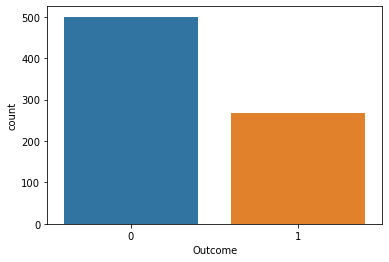

In [134]:
# draw a bar chart for each label
sns.countplot(x="Outcome", data=df)

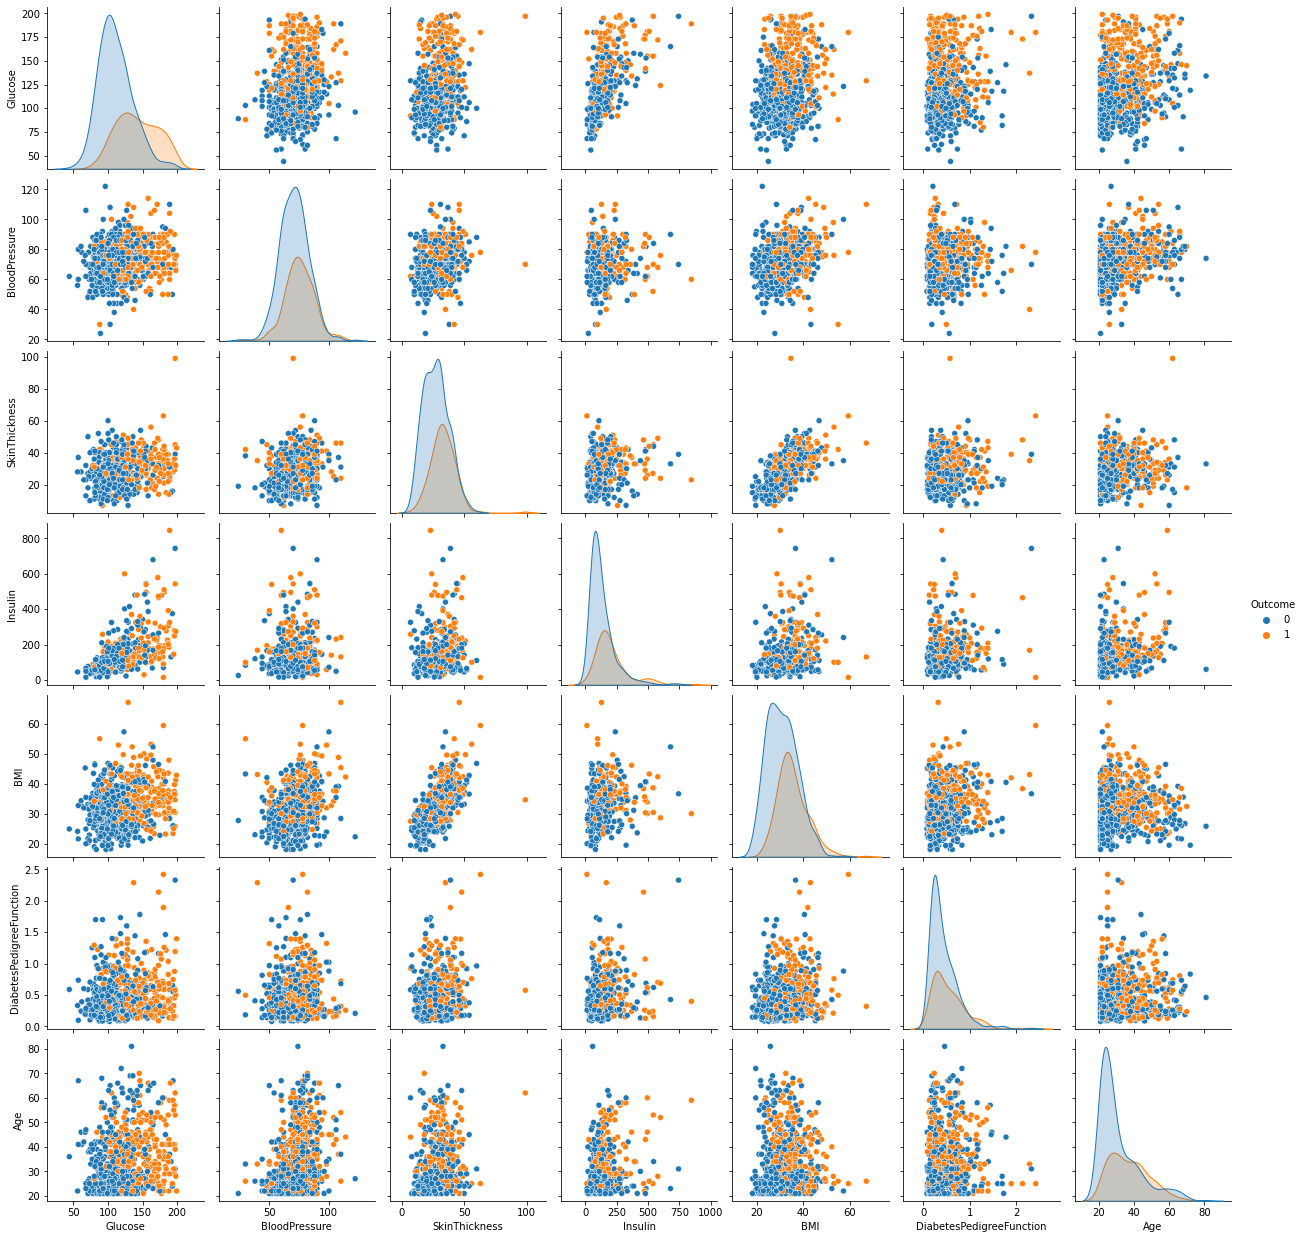

In [135]:
# Scatter plots of the first 10 "mean" features
sns.pairplot(df[list(df.columns[1:8]) + ['Outcome']], hue = "Outcome");

In [136]:
X = df.dropna()# drop missing data

# assign numeriscal label to y
y = X['Outcome']
X = X.drop('Outcome', axis=1)

<AxesSubplot:>

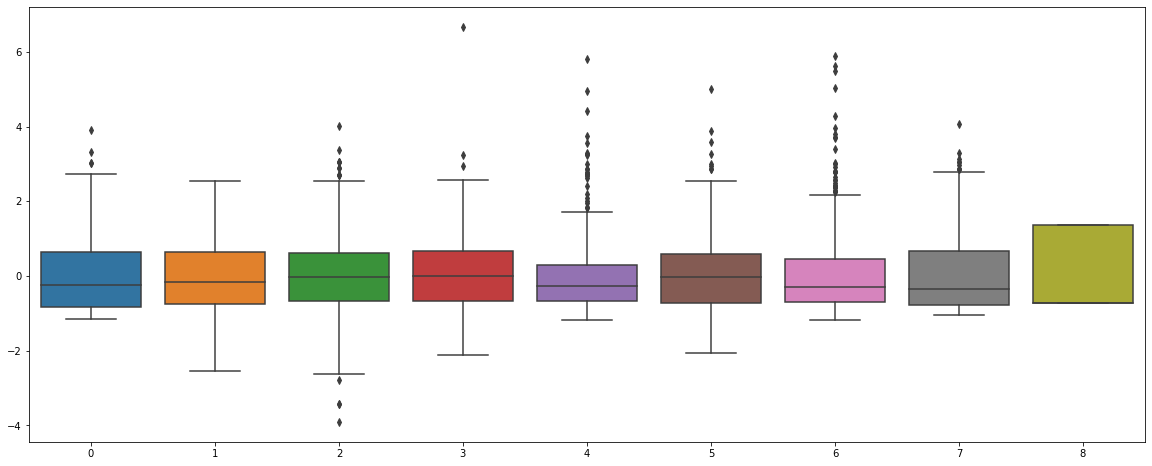

In [137]:
# Normalise the features to use zero mean normalisation


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
fig, ax=plt.subplots(1,figsize=(20, 8))
sns.boxplot(data=df, ax=ax)

In [138]:
X.shape

(392, 8)

In [139]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [140]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 27.6 KB


In [141]:
y = np.where(y == 0, -1, 1)

## Class SVM 

Source: https://www.python-engineer.com/courses/mlfromscratch/07_svm/
        With an excellent video explaining SVM's

In [91]:
import numpy as np 

class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [111]:
"""
from sklearn import datasets
X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
y = np.where(y == 0, -1, 1)
X.shape
"""

(50, 2)

In [142]:
y

array([-1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,
        1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,
        1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,
        1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
        1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1

In [143]:
model=SVM()
model.fit(X, y)
print(model.w, model.b)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U11'), dtype('<U32')) -> None

In [60]:
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, model.w, model.b, 0)
        x1_2 = get_hyperplane_value(x0_2, model.w, model.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, model.w, model.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, model.w, model.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, model.w, model.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, model.w, model.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()



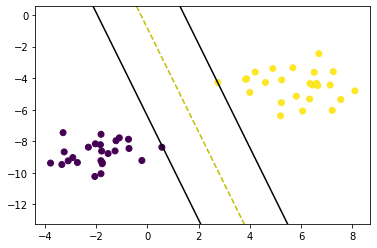

In [61]:
visualize_svm()